In [109]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit

In [272]:
df = pd.read_csv('LCCu1.txt', skipinitialspace=True, skiprows= 134)
df.dropna(axis=1, inplace = True)


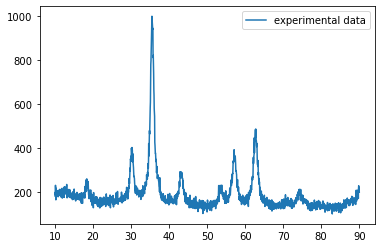

In [307]:
def pvoigt(x, A, mu, sigma, alpha, K):
    sigmag=sigma*math.sqrt(2*math.log(2))
    return ((1-alpha)*A/(sigmag*math.sqrt(2*math.pi))) * (np.exp(-(x-mu)**2 / (2*sigmag**2))) + (alpha*A/math.pi)*(sigma/((x - mu)**2 + sigma**2)) + K


def gauss(x,A,mu,sigma,K):
    return (A / (sigma * math.sqrt(2 * math.pi)) * np.exp(-(x-mu)**2 / (2*sigma**2)))+K


# fig, ax = plt.subplots()
# ax.plot(df['Angle'], gauss(df['Angle'], 911.575, 35.566, 0.497, 210.500), color='g', label='gauss')

# ax.plot(df['Angle'], pvoigt(df['Angle'], 1508.265, 35.565, 0.564, 1.103, 149.717), color='r', label='pvoigt')
plt.plot(df['Angle'], df['Det1Disc1'], label='experimental data')
plt.legend()

Qual é o ponto a? 32
Qual é o ponto b? 39


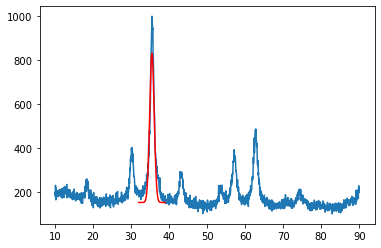

In [280]:
point_a = float(input('Qual é o ponto a? '))
point_b = float(input('Qual é o ponto b? '))

afit = df[(df['Angle'] >= point_a) & (df['Angle'] <= point_b)]
afit.reset_index(drop=True, inplace=True)

guess = [max(afit['Det1Disc1']), np.mean(afit['Angle']), 0.5, 0, min(afit['Det1Disc1'])]

n = len(afit['Angle'])
y = np.empty(n)

for i in range(n):
    y[i] = pvoigt(afit['Angle'][i], guess[0], guess[1], guess[2], guess[3], guess[4])
    

plt.plot(df['Angle'], df['Det1Disc1'])
plt.plot(afit['Angle'], y, 'r')

Amplitude: 1508.276,
 Média mu: 35.565,
 Sigma: 0.564,
 Alpha: 1.103,
 K (offset): 149.716


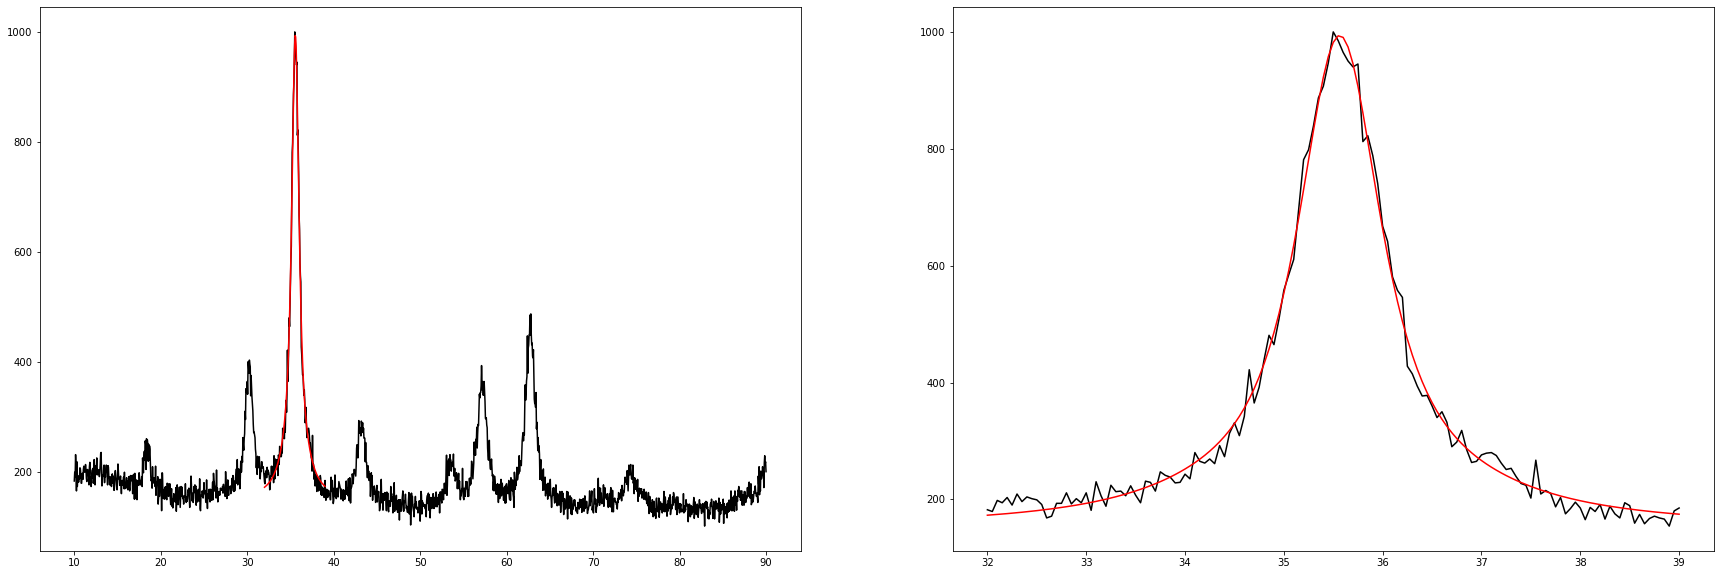

In [311]:
a = afit['Angle'].values
s = afit['Det1Disc1'].values
c, cov = curve_fit(pvoigt, a, s, guess)
# print(c)

for i in range(n):
    y[i] = pvoigt(afit['Angle'][i], c[0], c[1], c[2], c[3], c[4])


# plt.plot(df['Angle'], df['Det1Disc1'], alpha=0.5, color='black')
# plt.plot(afit['Angle'], y, 'r')

fig, axs = plt.subplots(1, 2, figsize=(30, 10))
axs[0].plot(df['Angle'], df['Det1Disc1'], color='black')
axs[0].plot(afit['Angle'], y, color='red')

axs[1].plot(afit['Angle'], afit['Det1Disc1'], color='black')
axs[1].plot(afit['Angle'], y, color='red')


print(f'Amplitude: {c[0]:3.3f},\n
        Média mu: {c[1]:3.3f},\n
        Sigma: {c[2]:3.3f},\n
        Alpha: {c[3]:3.3f},\n
        K (offset): {c[4]:3.3f}')

In [283]:
from sklearn.metrics import r2_score
print('R2: ', r2_score(y, s))

R2:  0.9927881911565772
